# Alexnet


### Arquitetura AlexNet




A arquitetura de rede é dada abaixo:


![Alexnet-Architecture](https://i.ibb.co/wBwm4GN/1-3-B8i-O-se13v-A2-Qf-Z4-OBRSw.png)


### Explicação do modelo: 

A entrada para este modelo tem as dimensões 227x227x3 seguidas por uma camada convolucional com 96 filtros de 11x11 dimensões e tendo um 'same' padding e um passo de 4. As dimensões de saída resultantes são dadas como:

```
floor(((n + 2*padding - filter)/stride) + 1 ) * floor(((n + 2*padding — filter)/stride) + 1)
```

Nota: Esta fórmula é para entrada quadrada com altura = largura = n

Explicando a primeira camada com entrada 227x227x3 e camada convolucional com 96 filtros de 11x11 , padding 'same' e passo = 4 , dims de saída serão


```
 = floor(((227 + 0–11)/4) + 1) * floor(((227 + 0–11)/4) + 1)
 = floor((216/4) + 1) * floor((216/4) + 1)
 = floor(54 + 1) * floor(54 + 1)
 = 55 * 55
```



Como o número de filtros = 96, a saída da primeira camada é: 55x55x96


Continuando temos a camada MaxPooling (3,3) com passo de 2, fazendo com que o tamanho da saída diminua para 27x27x96, seguido por outra Camada Convolucional com 256, (5,5) filtros e 'same' padding, ou seja, a saída altura e largura são mantidas como a camada anterior, portanto, a saída desta camada é 27x27x256.

Em seguida temos o MaxPooling novamente, reduzindo o tamanho para 13x13x256.  Outra Operação Convolucional com 384, (3,3) filtros com o mesmo preenchimento é aplicada duas vezes dando a saída como 13x13x384, seguida por outra Camada Convulucional com 256, (3,3) filtros e o mesmo preenchimento resultando em uma saída 13x13x256.

Isso é MaxPooled e as dimensões são reduzidas para 6x6x256.  Além disso, a camada é achatada e são feitas 2 camadas totalmente conectadas com 4096 unidades cada, que são conectadas ainda a uma camada softmax de 1000 unidades.  A rede é usada para classificar um grande número de classes conforme nossa exigência.  No entanto, no nosso caso, faremos a camada softmax de saída com 6 unidades, pois temos que classificar em 6 classes.  A camada softmax nos dá as probabilidades para cada classe à qual uma imagem de entrada pode pertencer.




In [2]:
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print('X_train.shape : ',X_train.shape)
print('y_train.shape : ',y_train.shape)
print('X_test.shape : ',X_test.shape)
print('y_test.shape : ',y_test.shape)
print('y_test[0:10] : ',y_test[0:10])

X_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000, 1)
X_test.shape :  (10000, 32, 32, 3)
y_test.shape :  (10000, 1)
y_test[0:10] :  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


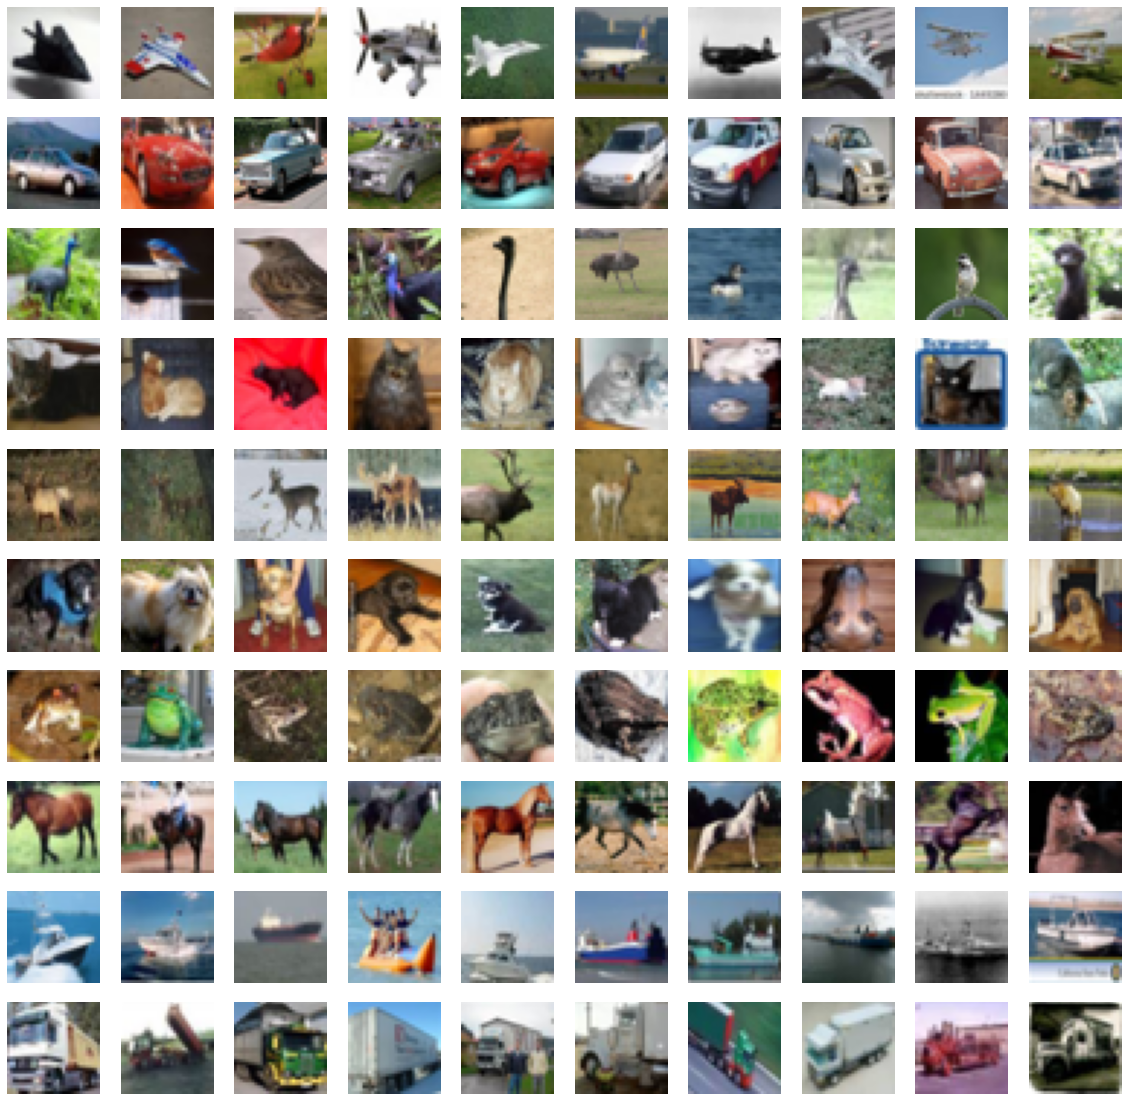

In [4]:
nclasses = 10
pos = 1
plt.figure(figsize=(20,20))
for i in range(nclasses):
    targets = np.where(y_train==i)[0]
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        img = X_train[idx]
        plt.imshow(img)
        plt.axis('off')
        pos += 1
plt.show()



In [4]:
X_train_origin = X_train
X_test_origin = X_test

In [5]:
IMG_ROWS = X_train[0].shape[1]
IMG_COLS = X_train[0].shape[0]

NB_CLASSES = len(set(y_train.flatten()))

INPUT_SHAPE = X_train.shape[1:4]

print(IMG_ROWS, IMG_COLS, NB_CLASSES, INPUT_SHAPE)
print('Treinamento ', X_train.shape[0])
print('Teste ', X_test.shape[0])

32 32 10 (32, 32, 3)
Treinamento  50000
Teste  10000


In [6]:
# float e Normalização
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# converter para to_categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [8]:
# alexnet　

model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='same',activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))
model.add(BatchNormalization())


model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                        

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 14.9 MB/s 


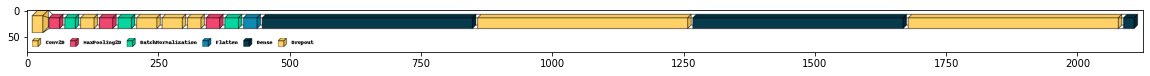

In [9]:
!pip install visualkeras

import visualkeras


plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

In [28]:
#constantes
BATCH_SIZE = 128
NB_EPOCH = 100

VERBOSE = 1
VALIDATION_SPLIT = 0.2

# train

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)

Epoch 1/100
313/313 [==============================] - 13s 31ms/step - loss: 0.7238 - accuracy: 0.7655 - val_loss: 1.9885 - val_accuracy: 0.5508
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6511 - accuracy: 0.7925 - val_loss: 1.6277 - val_accuracy: 0.5974
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6215 - accuracy: 0.8050 - val_loss: 2.1055 - val_accuracy: 0.5611
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5603 - accuracy: 0.8239 - val_loss: 3.3849 - val_accuracy: 0.4511
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5475 - accuracy: 0.8311 - val_loss: 1.6451 - val_accuracy: 0.6262
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.4963 - accuracy: 0.8458 - val_loss: 1.5689 - val_accuracy: 0.6141
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.4634 - accuracy: 0.8590 - val_loss: 2.6524 - val_accuracy

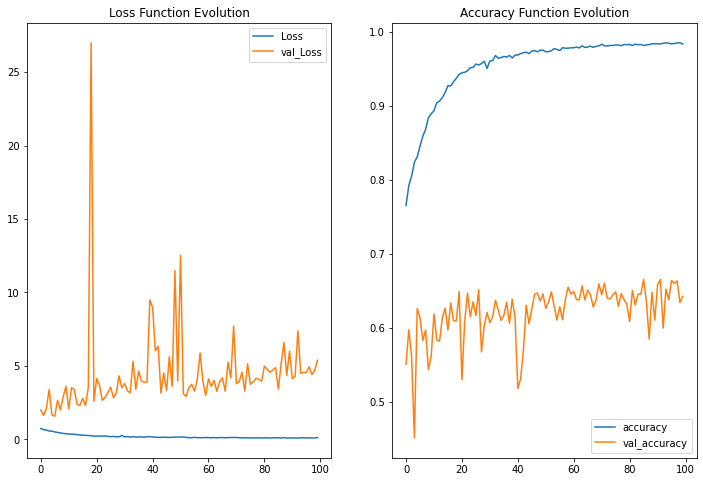

In [29]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [13]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                       batch_size=BATCH_SIZE,
                       verbose=VERBOSE)

Testing...
79/79 [==============================] - 1s 8ms/step - loss: 1.6477 - accuracy: 0.5685


In [14]:
print("\nTeste score:", score[0])
print('Teste accuracy:', score[1])


Teste score: 1.6476788520812988
Teste accuracy: 0.5684999823570251


In [15]:
pred_proba = model.predict(X_test)
pred_proba

313/313 [==============================] - 1s 3ms/step


array([[7.2034460e-04, 3.1403448e-05, 1.5281061e-02, ..., 1.9965732e-02,
        6.2141183e-04, 4.2376487e-04],
       [2.3488780e-02, 2.0030859e-01, 1.2399587e-04, ..., 3.0960098e-08,
        7.7149624e-01, 4.5035835e-03],
       [1.2391227e-02, 1.3669192e-04, 2.6894209e-06, ..., 4.4465376e-10,
        9.8740989e-01, 5.8140351e-05],
       ...,
       [1.1606847e-03, 8.2128769e-04, 1.7311108e-01, ..., 5.8168970e-02,
        1.1356004e-03, 2.2432951e-03],
       [4.7083918e-04, 9.9591380e-01, 2.6961285e-04, ..., 4.9086452e-08,
        9.9803926e-04, 2.1974659e-03],
       [6.2639956e-18, 2.6066499e-21, 8.3772339e-17, ..., 1.0000000e+00,
        1.3173365e-30, 4.0469716e-14]], dtype=float32)

In [16]:
pred = np.argmax(pred_proba, axis=1)
pred

array([3, 8, 8, ..., 5, 1, 7])

In [17]:
match_ = np.int32(pred == y_test)
match_

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [18]:
y_test_ = np.argmax(Y_test, axis=1)
y_test_

array([3, 8, 8, ..., 5, 1, 7])

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report

CM = confusion_matrix(y_test_, pred)
CM

array([[661,  14,  11,   9,  48,   1,  11,  34, 196,  15],
       [ 60, 666,   7,   6,  13,   1,  17,  13, 157,  60],
       [120,   8, 354,  54, 254,  11,  87,  66,  42,   4],
       [ 34,  18,  48, 327, 318,  23,  77,  91,  52,  12],
       [ 39,   1,  39,  15, 680,   0,  63, 137,  26,   0],
       [ 20,   9,  55, 205, 311, 133,  53, 153,  54,   7],
       [ 10,   5,  23,  48, 173,   5, 702,  11,  22,   1],
       [ 28,   2,  31,  17, 122,   9,   8, 763,  14,   6],
       [ 37,  17,   6,   4,  28,   0,   4,   6, 891,   7],
       [ 66, 167,   9,  17,  25,   1,  21,  46, 140, 508]])

In [20]:
print('teste Accuracy : {:.4f}'.format(accuracy_score(y_test_, pred)))

teste Accuracy : 0.5685


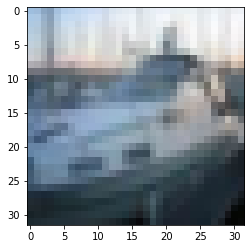

In [21]:
title_list = ['airplane',
              'automobile',
              'bird',
              'cat',
              'deer',
              'dog',
              'frog',
              'horse',
              'ship',
              'track']


N_error = 2
plt.imshow(X_test_origin[N_error])

In [22]:
N_title_label = y_test_[N_error]
N_title_pred = pred[N_error]

title_label = title_list[N_title_label]
title_pred = title_list[N_title_pred]

print('Lavel : {}, Predicted : {}'.format(title_label, title_pred))

Lavel : ship, Predicted : ship


In [23]:
N_error = 3

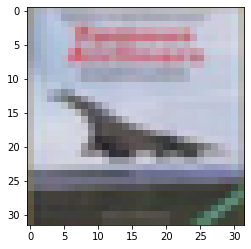

In [24]:
plt.imshow(X_test_origin[N_error])

In [25]:
N_title_label = y_test_[N_error]
N_title_pred = pred[N_error]

title_label = title_list[N_title_label]
title_pred = title_list[N_title_pred]

print('Lavel : {}, Predicted : {}'.format(title_label, title_pred))

Lavel : airplane, Predicted : airplane


In [26]:
np.round(pred_proba[N_error], 3)

array([0.965, 0.   , 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.029,
       0.001], dtype=float32)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

it_train = datagen.flow(X_train, y_train, batch_size=64)
steps = int(X_train.shape[0] / 64)

history = model.fit_generator(
    it_train,
    steps_per_epoch=steps,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/100
  1/781 [..............................] - ETA: 50s - loss: 2676447744.0000 - accuracy: 0.0938

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


781/781 [==============================] - 32s 41ms/step - loss: 3688673280.0000 - accuracy: 0.1931 - val_loss: 25356428.0000 - val_accuracy: 0.0778
Epoch 2/100
781/781 [==============================] - 33s 42ms/step - loss: 5496729600.0000 - accuracy: 0.1744 - val_loss: 56080648.0000 - val_accuracy: 0.0952
Epoch 3/100
781/781 [==============================] - 31s 40ms/step - loss: 7862173696.0000 - accuracy: 0.1576 - val_loss: 69081952.0000 - val_accuracy: 0.0916
Epoch 4/100
781/781 [==============================] - 32s 40ms/step - loss: 10944773120.0000 - accuracy: 0.1466 - val_loss: 81386592.0000 - val_accuracy: 0.0952
Epoch 5/100
781/781 [==============================] - 31s 40ms/step - loss: 14804704256.0000 - accuracy: 0.1364 - val_loss: 64951164.0000 - val_accuracy: 0.1014
Epoch 6/100
781/781 [==============================] - 31s 39ms/step - loss: 19407601664.0000 - accuracy: 0.1274 - val_loss: 70911168.0000 - val_accuracy: 0.0952
Epoch 7/100
781/781 [======================